In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Facebook_Data_Analysis").getOrCreate()
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)
spark

In [2]:
df=spark.read.csv("pseudo_facebook.csv",header=True,inferSchema=True)

In [36]:
df

+-------+---+-------+--------+---------+------+------+------------+---------------------+-----+--------------+------------+---------------------+---------+------------------+
| userid|age|dob_day|dob_year|dob_month|gender|tenure|friend_count|friendships_initiated|likes|likes_received|mobile_likes|mobile_likes_received|www_likes|www_likes_received|
+-------+---+-------+--------+---------+------+------+------------+---------------------+-----+--------------+------------+---------------------+---------+------------------+
|2094382| 14|     19|    1999|       11|  male|   266|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1192601| 14|      2|    1999|       11|female|     6|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|2083884| 14|     16|    1999|       11|  male|    13|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1203168| 14|     25|    1999|       12|female|    93|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1733186| 14|      4|    1999|       12|  male|    82|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1524765| 14|      1|    1999|       12|  male|    15|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1136133| 13|     14|    2000|        1|  male|    12|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1680361| 13|      4|    2000|        1|female|     0|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1365174| 13|      1|    2000|        1|  male|    81|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1712567| 13|      2|    2000|        2|  male|   171|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1612453| 13|     22|    2000|        2|  male|    98|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|2104073| 13|      1|    2000|        2|  male|    55|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1918584| 13|      5|    2000|        3|  male|   106|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1704433| 13|     21|    2000|        3|  male|    61|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1932519| 13|     28|    2000|        3|female|     0|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1751722| 13|      7|    2000|        4|female|    16|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1470850| 13|     30|    2000|        5|female|    34|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1001768| 13|     23|    2000|        5|female|    25|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1537661| 13|     16|    2000|        5|female|     4|           0|                    0|    0|             0|           0|                    0|        0|                 0|
|1020296| 13|     13|    2000|        8|  male|     9|           0|                    0|    0|             0|           0|                    0|     

In [3]:
facebook_df=df.toPandas()

In [4]:
facebook_df.head()

userid  age  dob_day  dob_year  dob_month  gender tenure  friend_count  \
0  2094382   14       19      1999         11    male    266             0   
1  1192601   14        2      1999         11  female      6             0   
2  2083884   14       16      1999         11    male     13             0   
3  1203168   14       25      1999         12  female     93             0   
4  1733186   14        4      1999         12    male     82             0   

   friendships_initiated  likes  likes_received  mobile_likes  \
0                      0      0               0             0   
1                      0      0               0             0   
2                      0      0               0             0   
3                      0      0               0             0   
4                      0      0               0             0   

   mobile_likes_received  www_likes  www_likes_received  
0                      0          0                   0  
1                      0          0                   0  
2                      0          0                   0  
3                      0          0                   0  
4                      0          0                   0

In [5]:
facebook_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   userid                 99003 non-null  int32 
 1   age                    99003 non-null  int32 
 2   dob_day                99003 non-null  int32 
 3   dob_year               99003 non-null  int32 
 4   dob_month              99003 non-null  int32 
 5   gender                 99003 non-null  object
 6   tenure                 99003 non-null  object
 7   friend_count           99003 non-null  int32 
 8   friendships_initiated  99003 non-null  int32 
 9   likes                  99003 non-null  int32 
 10  likes_received         99003 non-null  int32 
 11  mobile_likes           99003 non-null  int32 
 12  mobile_likes_received  99003 non-null  int32 
 13  www_likes              99003 non-null  int32 
 14  www_likes_received     99003 non-null  int32 
dtypes: int32(13), objec

In [6]:
facebook_df.describe(include='all')

userid           age       dob_day      dob_year     dob_month  \
count   9.900300e+04  99003.000000  99003.000000  99003.000000  99003.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    1.597045e+06     37.280224     14.530408   1975.719776      6.283365   
std     3.440592e+05     22.589748      9.015606     22.589748      3.529672   
min     1.000008e+06     13.000000      1.000000   1900.000000      1.000000   
25%     1.298806e+06     20.000000      7.000000   1963.000000      3.000000   
50%     1.596148e+06     28.000000     14.000000   1985.000000      6.000000   
75%     1.895744e+06     50.000000     22.000000   1993.000000      9.000000   
max     2.193542e+06    113.000000     31.000000   2000.000000     12.000000   

       gender tenure  friend_count  friendships_initiated         likes  \
count   99003  99003  99003.000000           99003.000000  99003.000000   
unique      3   2427           NaN                    NaN           NaN   
top      male    300           NaN                    NaN           NaN   
freq    58574    173           NaN                    NaN           NaN   
mean      NaN    NaN    196.350787             107.452471    156.078785   
std       NaN    NaN    387.304229             188.786951    572.280681   
min       NaN    NaN      0.000000               0.000000      0.000000   
25%       NaN    NaN     31.000000              17.000000      1.000000   
50%       NaN    NaN     82.000000              46.000000     11.000000   
75%       NaN    NaN    206.000000             117.000000     81.000000   
max       NaN    NaN   4923.000000            4144.000000  25111.000000   

        likes_received  mobile_likes  mobile_likes_received     www_likes  \
count     99003.000000  99003.000000           99003.000000  99003.000000   
unique             NaN           NaN                    NaN           NaN   
top                NaN           NaN                    NaN           NaN   
freq               NaN           NaN                    NaN           NaN   
mean        142.689363    106.116300              84.120491     49.962425   
std        1387.919613    445.252985             839.889444    285.560152   
min           0.000000      0.000000               0.000000      0.000000   
25%           1.000000      0.000000               0.000000      0.000000   
50%           8.000000      4.000000               4.000000      0.000000   
75%          59.000000     46.000000              33.000000      7.000000   
max      261197.000000  25111.000000          138561.000000  14865.000000   

        www_likes_received  
count         99003.000000  
unique                 NaN  
top                    NaN  
freq                   NaN  
mean             58.568831  
std             601.416348  
min               0.000000  
25%               0.000000  
50%               2.000000  
75%              20.000000  
max          129953.000000

In [7]:
import pandas_profiling

In [8]:
profile = facebook_df.profile_report(title = 'Pre Profile Facebook Dataset')
profile.to_file(output_file='Pre Profile Facebook Data Analysis before Processing.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
facebook_df.drop('userid',axis =1,inplace=True)

In [10]:
facebook_df['gender'].mode()

0    male
dtype: object

In [11]:
facebook_df['gender'] = facebook_df['gender'].replace(np.NaN,'male')

In [12]:
facebook_df['gender'].unique()

array(['male', 'female', 'NA'], dtype=object)

In [14]:
facebook_df['tenure'] = facebook_df['tenure'].replace(np.NaN,412.0)

In [15]:
facebook_df.isnull().sum().sort_values(ascending = False)

age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [16]:
facebook_df.insert(1,"date_of_birth",pd.to_datetime(facebook_df.dob_year*10000+facebook_df.dob_month*100+facebook_df.dob_day,format='%Y%m%d'))

In [17]:
facebook_df.head()

age date_of_birth  dob_day  dob_year  dob_month  gender tenure  \
0   14    1999-11-19       19      1999         11    male    266   
1   14    1999-11-02        2      1999         11  female      6   
2   14    1999-11-16       16      1999         11    male     13   
3   14    1999-12-25       25      1999         12  female     93   
4   14    1999-12-04        4      1999         12    male     82   

   friend_count  friendships_initiated  likes  likes_received  mobile_likes  \
0             0                      0      0               0             0   
1             0                      0      0               0             0   
2             0                      0      0               0             0   
3             0                      0      0               0             0   
4             0                      0      0               0             0   

   mobile_likes_received  www_likes  www_likes_received  
0                      0          0                   0  
1                      0          0                   0  
2                      0          0                   0  
3                      0          0                   0  
4                      0          0                   0

In [18]:
facebook_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   age                    99003 non-null  int32         
 1   date_of_birth          99003 non-null  datetime64[ns]
 2   dob_day                99003 non-null  int32         
 3   dob_year               99003 non-null  int32         
 4   dob_month              99003 non-null  int32         
 5   gender                 99003 non-null  object        
 6   tenure                 99003 non-null  object        
 7   friend_count           99003 non-null  int32         
 8   friendships_initiated  99003 non-null  int32         
 9   likes                  99003 non-null  int32         
 10  likes_received         99003 non-null  int32         
 11  mobile_likes           99003 non-null  int32         
 12  mobile_likes_received  99003 non-null  int32         
 13  w

In [19]:
facebook_df.describe(include = 'all')

<ipython-input-19-4611acba0a21>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  facebook_df.describe(include = 'all')


age        date_of_birth       dob_day      dob_year  \
count   99003.000000                99003  99003.000000  99003.000000   
unique           NaN                23151           NaN           NaN   
top              NaN  1988-01-01 00:00:00           NaN           NaN   
freq             NaN                  656           NaN           NaN   
first            NaN  1900-01-01 00:00:00           NaN           NaN   
last             NaN  2000-10-27 00:00:00           NaN           NaN   
mean       37.280224                  NaN     14.530408   1975.719776   
std        22.589748                  NaN      9.015606     22.589748   
min        13.000000                  NaN      1.000000   1900.000000   
25%        20.000000                  NaN      7.000000   1963.000000   
50%        28.000000                  NaN     14.000000   1985.000000   
75%        50.000000                  NaN     22.000000   1993.000000   
max       113.000000                  NaN     31.000000   2000.000000   

           dob_month gender tenure  friend_count  friendships_initiated  \
count   99003.000000  99003  99003  99003.000000           99003.000000   
unique           NaN      3   2427           NaN                    NaN   
top              NaN   male    300           NaN                    NaN   
freq             NaN  58574    173           NaN                    NaN   
first            NaN    NaN    NaN           NaN                    NaN   
last             NaN    NaN    NaN           NaN                    NaN   
mean        6.283365    NaN    NaN    196.350787             107.452471   
std         3.529672    NaN    NaN    387.304229             188.786951   
min         1.000000    NaN    NaN      0.000000               0.000000   
25%         3.000000    NaN    NaN     31.000000              17.000000   
50%         6.000000    NaN    NaN     82.000000              46.000000   
75%         9.000000    NaN    NaN    206.000000             117.000000   
max        12.000000    NaN    NaN   4923.000000            4144.000000   

               likes  likes_received  mobile_likes  mobile_likes_received  \
count   99003.000000    99003.000000  99003.000000           99003.000000   
unique           NaN             NaN           NaN                    NaN   
top              NaN             NaN           NaN                    NaN   
freq             NaN             NaN           NaN                    NaN   
first            NaN             NaN           NaN                    NaN   
last             NaN             NaN           NaN                    NaN   
mean      156.078785      142.689363    106.116300              84.120491   
std       572.280681     1387.919613    445.252985             839.889444   
min         0.000000        0.000000      0.000000               0.000000   
25%         1.000000        1.000000      0.000000               0.000000   
50%        11.000000        8.000000      4.000000               4.000000   
75%        81.000000       59.000000     46.000000              33.000000   
max     25111.000000   261197.000000  25111.000000          138561.000000   

           www_likes  www_likes_received  
count   99003.000000        99003.000000  
unique           NaN                 NaN  
top              NaN                 NaN  
freq             NaN                 NaN  
first            NaN                 NaN  
last             NaN                 NaN  
mean       49.962425           58.568831  
std       285.560152          601.416348  
min         0.000000            0.000000  
25%         0.000000            0.000000  
50%         0.000000            2.000000  
75%         7.000000           20.000000  
max     14865.000000       129953.000000

In [20]:
profile = facebook_df.profile_report(title = 'Post Profile Facebook Dataset')
profile.to_file(output_file='Post Profile Facebook Data Analysis after Processing.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
facebook_df.drop_duplicates(inplace=True)

In [22]:
facebook_df.describe(include='all')

<ipython-input-22-6a1e3546f01b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  facebook_df.describe(include='all')


age        date_of_birth       dob_day      dob_year  \
count   98995.000000                98995  98995.000000  98995.000000   
unique           NaN                23151           NaN           NaN   
top              NaN  1988-01-01 00:00:00           NaN           NaN   
freq             NaN                  651           NaN           NaN   
first            NaN  1900-01-01 00:00:00           NaN           NaN   
last             NaN  2000-10-27 00:00:00           NaN           NaN   
mean       37.281146                  NaN     14.531502   1975.718854   
std        22.590414                  NaN      9.015150     22.590414   
min        13.000000                  NaN      1.000000   1900.000000   
25%        20.000000                  NaN      7.000000   1963.000000   
50%        28.000000                  NaN     14.000000   1985.000000   
75%        50.000000                  NaN     22.000000   1993.000000   
max       113.000000                  NaN     31.000000   2000.000000   

           dob_month gender tenure  friend_count  friendships_initiated  \
count   98995.000000  98995  98995  98995.000000           98995.000000   
unique           NaN      3   2427           NaN                    NaN   
top              NaN   male    300           NaN                    NaN   
freq             NaN  58566    173           NaN                    NaN   
first            NaN    NaN    NaN           NaN                    NaN   
last             NaN    NaN    NaN           NaN                    NaN   
mean        6.283792    NaN    NaN    196.366625             107.461124   
std         3.529495    NaN    NaN    387.315871             188.792125   
min         1.000000    NaN    NaN      0.000000               0.000000   
25%         3.000000    NaN    NaN     31.000000              17.000000   
50%         6.000000    NaN    NaN     82.000000              46.000000   
75%         9.000000    NaN    NaN    206.000000             117.000000   
max        12.000000    NaN    NaN   4923.000000            4144.000000   

               likes  likes_received  mobile_likes  mobile_likes_received  \
count   98995.000000    98995.000000  98995.000000           98995.000000   
unique           NaN             NaN           NaN                    NaN   
top              NaN             NaN           NaN                    NaN   
freq             NaN             NaN           NaN                    NaN   
first            NaN             NaN           NaN                    NaN   
last             NaN             NaN           NaN                    NaN   
mean      156.091399      142.700894    106.124875              84.127289   
std       572.302084     1387.975100    445.269954             839.923040   
min         0.000000        0.000000      0.000000               0.000000   
25%         1.000000        1.000000      0.000000               0.000000   
50%        11.000000        8.000000      4.000000               4.000000   
75%        81.000000       59.000000     46.000000              33.000000   
max     25111.000000   261197.000000  25111.000000          138561.000000   

           www_likes  www_likes_received  
count   98995.000000        98995.000000  
unique           NaN                 NaN  
top              NaN                 NaN  
freq             NaN                 NaN  
first            NaN                 NaN  
last             NaN                 NaN  
mean       49.966463           58.573564  
std       285.571337          601.440418  
min         0.000000            0.000000  
25%         0.000000            0.000000  
50%         0.000000            2.000000  
75%         7.000000           20.000000  
max     14865.000000       129953.000000

# Exploratory Data Analysis

# How the Age of Users Distributed in the Datatset

In [23]:
labels = ['12-14', '15-20','21-30','31-40','41-50', '51-60', '61-70', '71-80','81-90','91-100','101-110','111-120']
facebook_df['age_group'] = pd.cut(facebook_df['age'],
                         [10,15,20,30,40,50,60,70,80,90,100,110,120],
                         labels= labels, include_lowest=True)

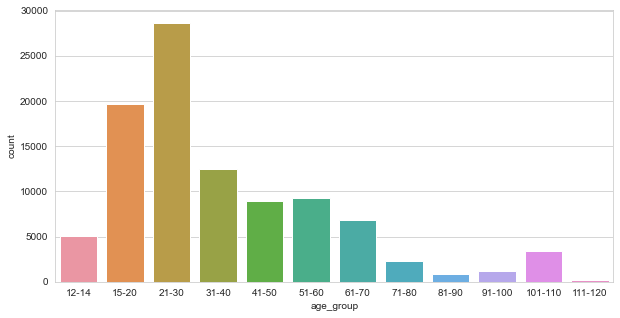

In [24]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.countplot(x='age_group',data=facebook_df)

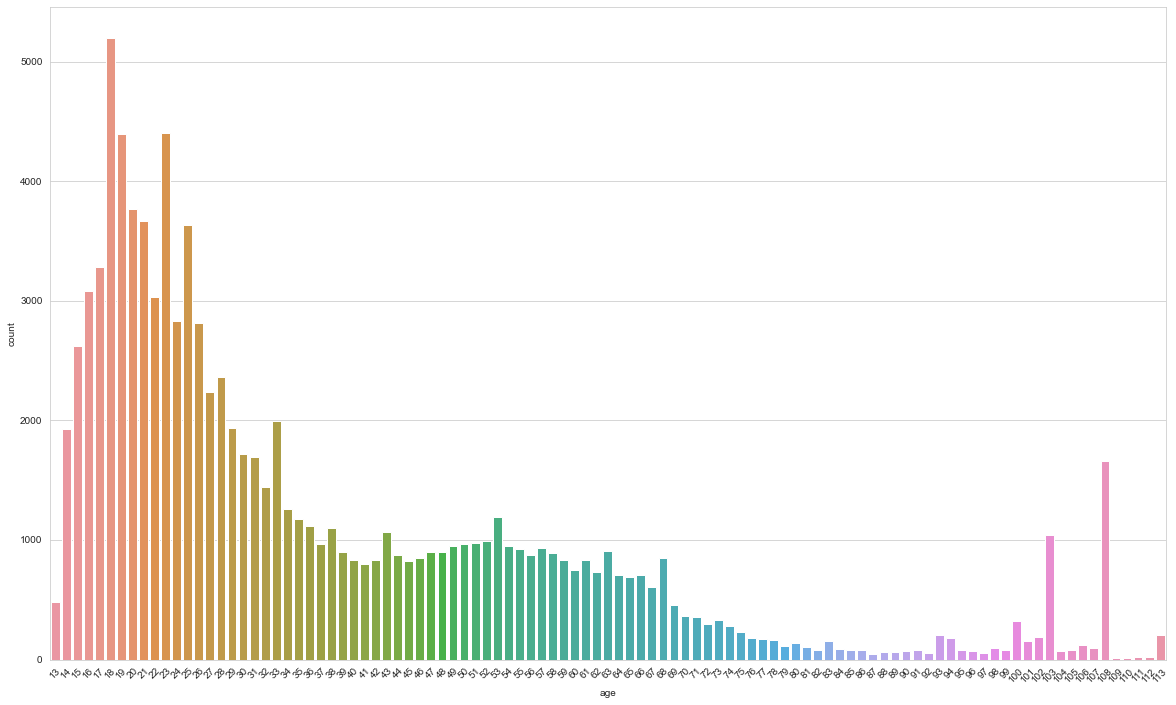

In [25]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,12))
plt.xticks(rotation=45)
sns.countplot(x='age',data=facebook_df)

From above graph it shows 103 ,108 and 113 age group, user count is higher compare to other years, might be user is providing incorrect detail by not specifying their year.

In [26]:
facebook_df.groupby(['age_group'])['age_group'].count()

age_group
12-14       5027
15-20      19725
21-30      28639
31-40      12490
41-50       8968
51-60       9319
61-70       6855
71-80       2249
81-90        817
91-100      1219
101-110     3449
111-120      238
Name: age_group, dtype: int64

* Maximun users of Facebook are of Age 15 to 30 years.
* Maximum Age:113 years and Minimum Age:13 years

## Gender wise Analysis

* Maximum users of Facebook are Males about 59.3%.

## Analysis based on Tenure

* From the above plot we can infer that more number of User have joined from Last 2 Years of data collection.

## Friend Count Distribution

In [29]:
facebook_df["friend_count"].value_counts()

0       1956
1       1815
2       1116
3        860
5        789
        ... 
3299       1
4576       1
2339       1
4384       1
2047       1
Name: friend_count, Length: 2562, dtype: int64

In [30]:
Percentage_of_friend_count_nill = facebook_df['friend_count'].value_counts().max() / (facebook_df.friend_count.count())*100
print('Percentage of Zero Friend Count = ', Percentage_of_friend_count_nill.round(decimals=2))

Percentage of Zero Friend Count =  1.98


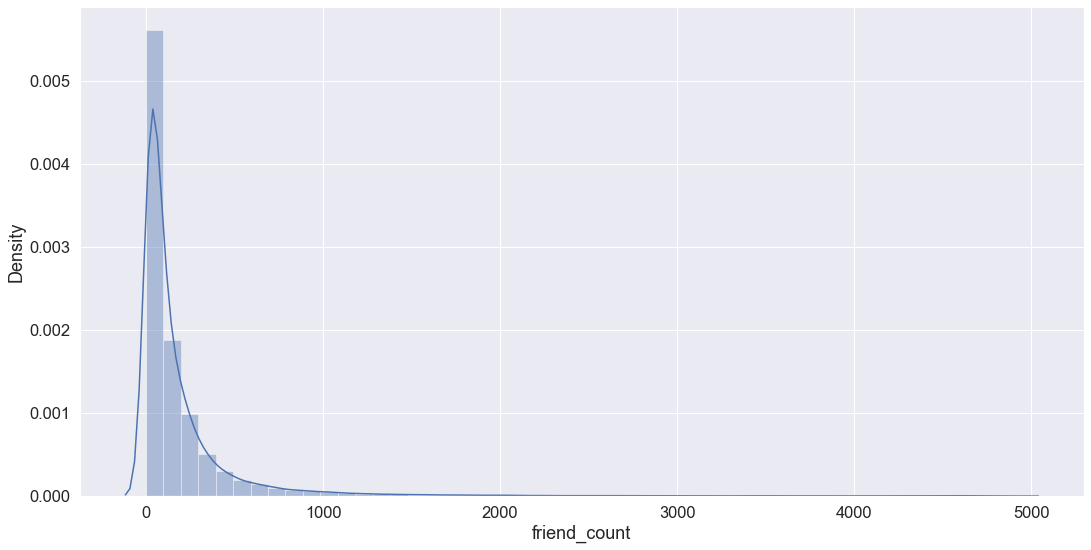

In [31]:
sns.set(color_codes=True)
plt.figure(figsize=(18,9))
sns.set_palette(sns.color_palette("muted"))
sns.set(font_scale=1.5)
sns.distplot(facebook_df["friend_count"])

* More number of users have fewer than 500 Facebook Friends
* 2% of users did not have any friends

## Analysis of Relation between Variables

### Comparing Gender wise users in Age Group

Text(0.5, 1.0, 'Age vs Gender')

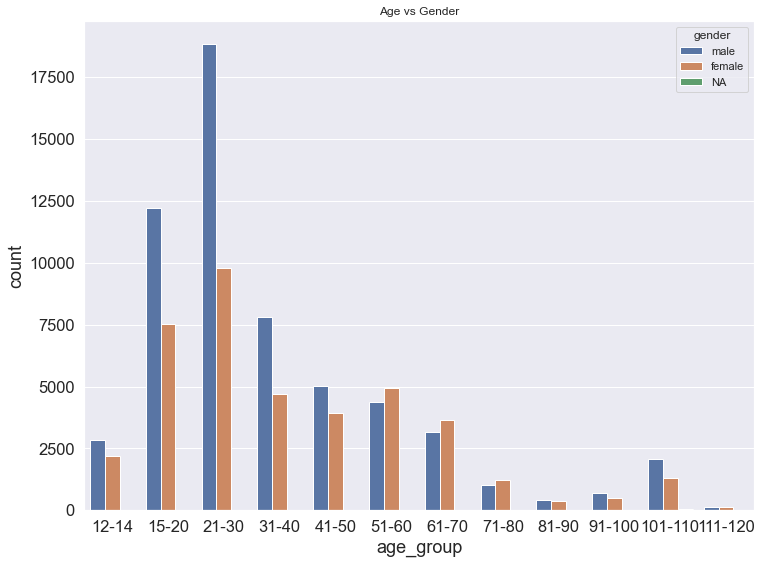

In [32]:
fig,ax =plt.subplots(figsize=(12,9))
sns.set(font_scale=1)
sns.countplot(data = facebook_df,x = 'age_group', hue='gender')
plt.title('Age vs Gender')

* across all age group male users are more, except age group 51 to 80 where female users are more.

### Gender vs Age

Text(0.5, 1.0, 'Age distribution using FacetGrid')

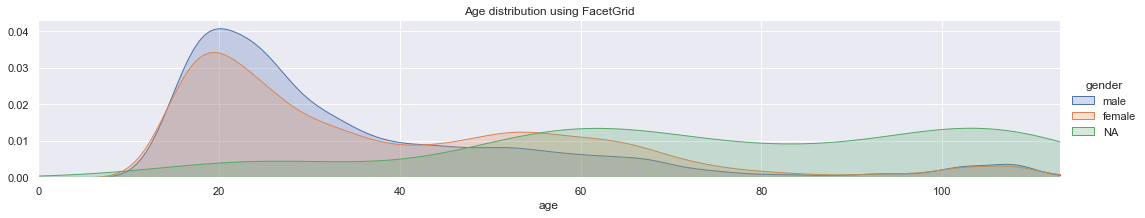

In [33]:
as_fig = sns.FacetGrid(facebook_df,hue='gender',aspect=5)
as_fig.map(sns.kdeplot,'age',shade=True)
oldest = facebook_df['age'].max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()
plt.title('Age distribution using FacetGrid')

* Maximum Facebook Users of Males & Females are of Age 15 - 30 years.

### Comparing Age vs Friend Count

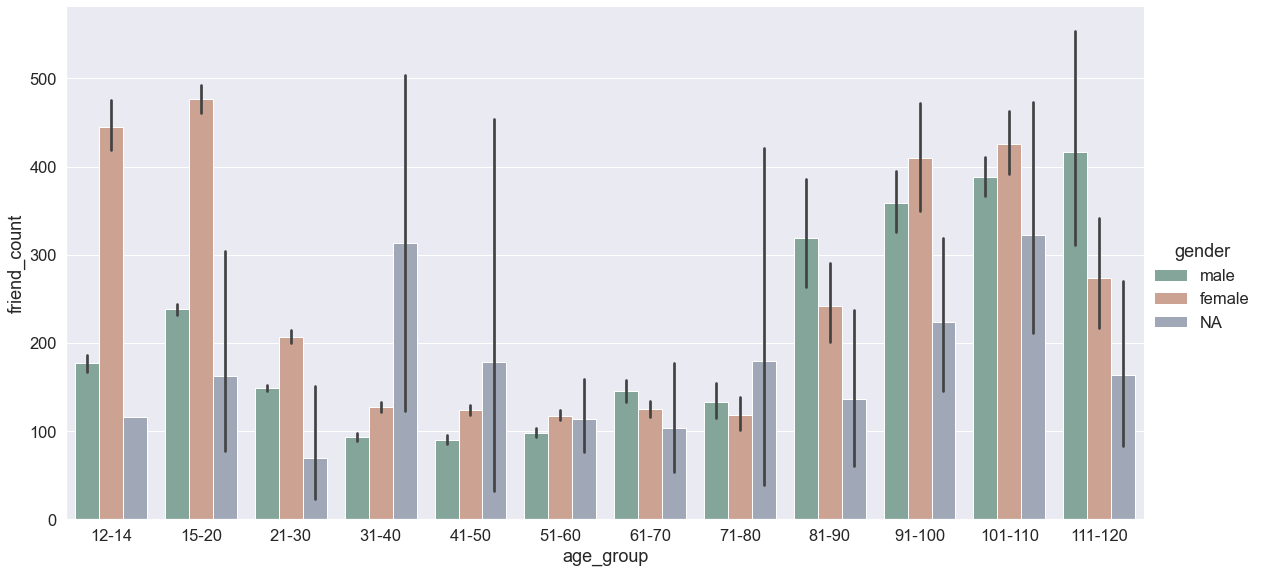

In [34]:
sns.set(font_scale=1.5)
sns.set_palette(sns.color_palette("Set2", n_colors=5, desat=.5))
sns.catplot(x="age_group", y='friend_count',hue ='gender',data=facebook_df, kind="bar",height=8, aspect=2)

* People with an age of less than 30 and more than 80 have more friends than the middle aged people.
* Females with an age of less than 30 have more friends than the Males.

### How does gender and age group related to Likes

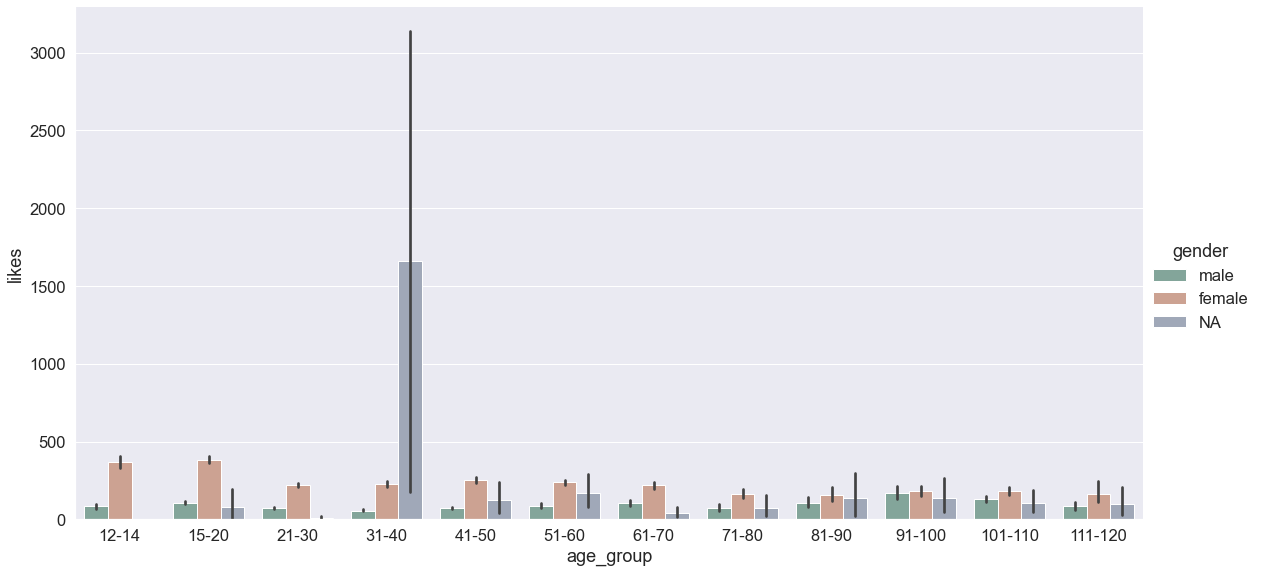

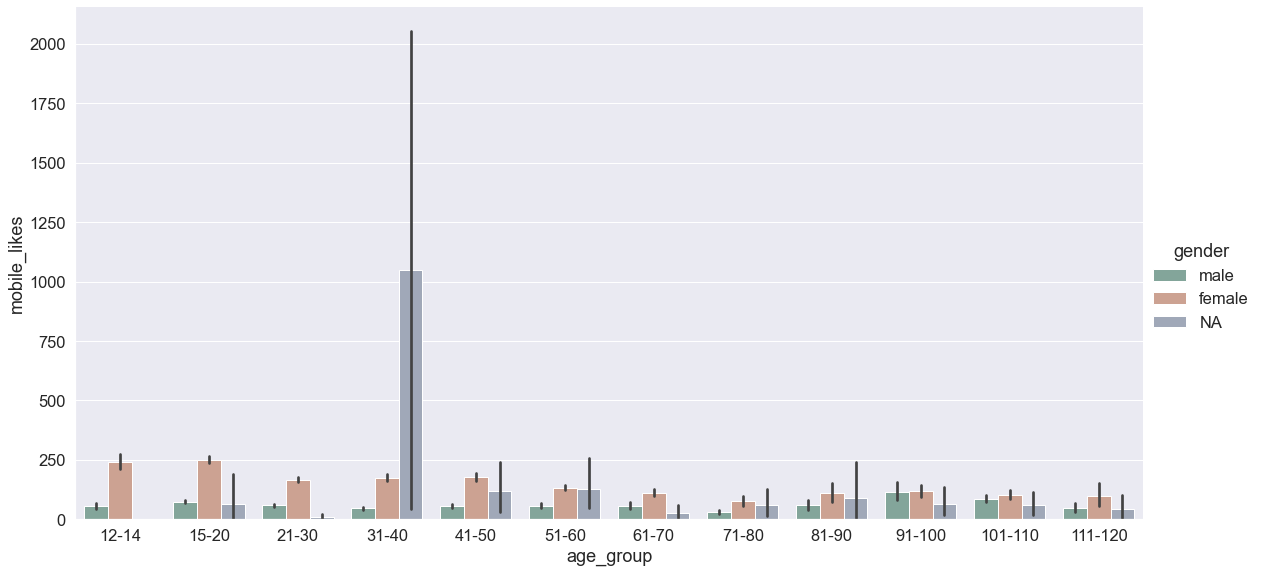

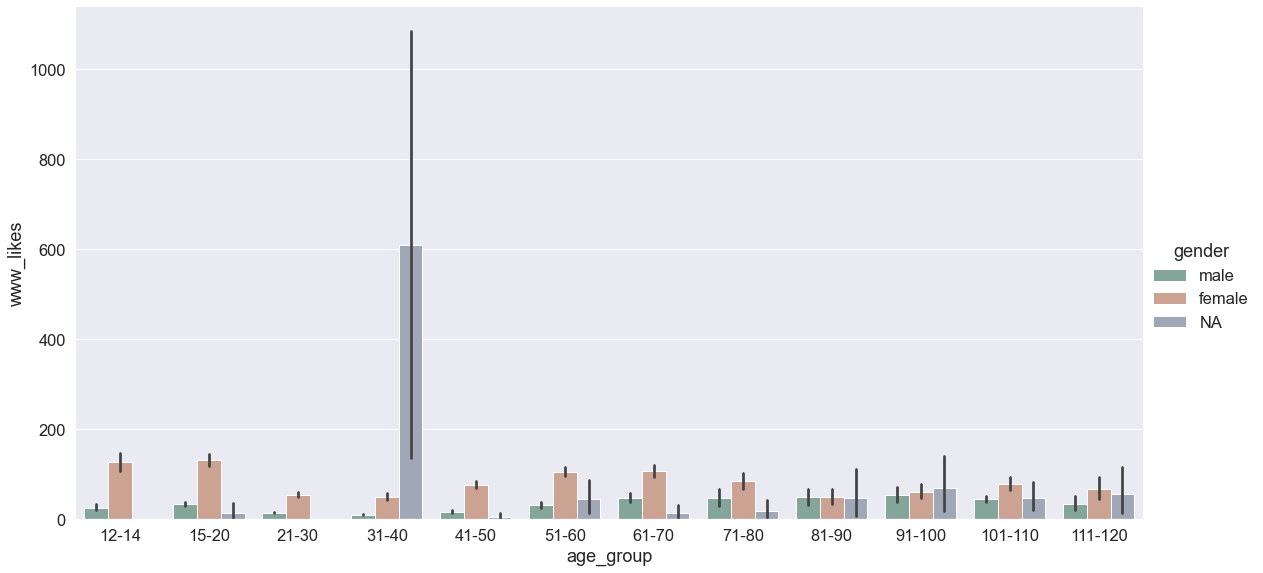

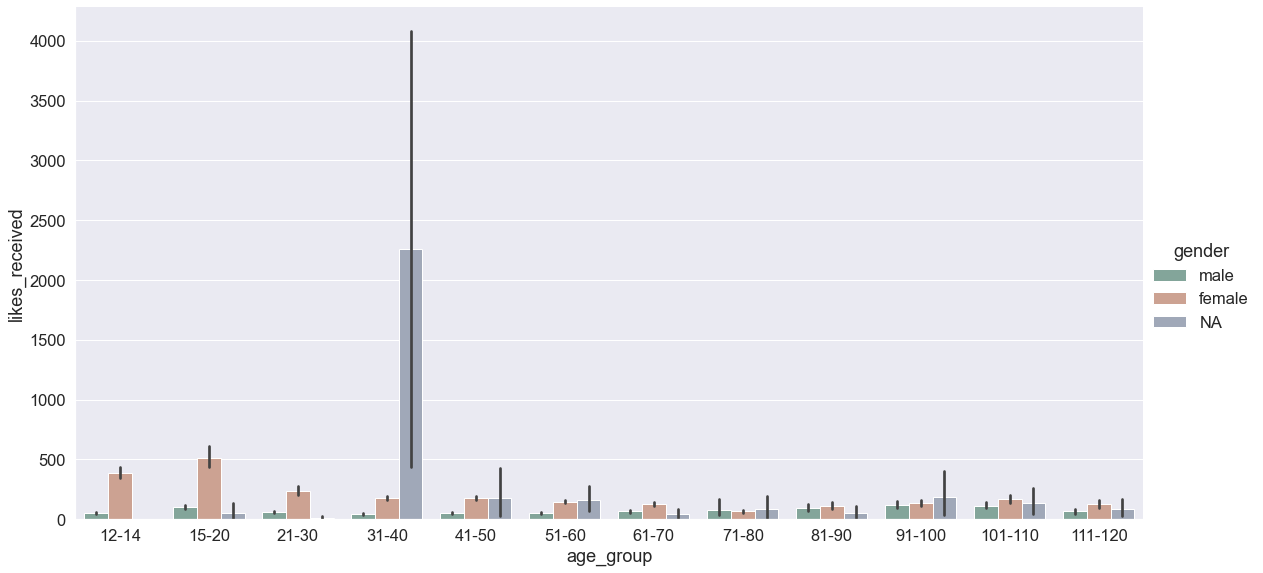

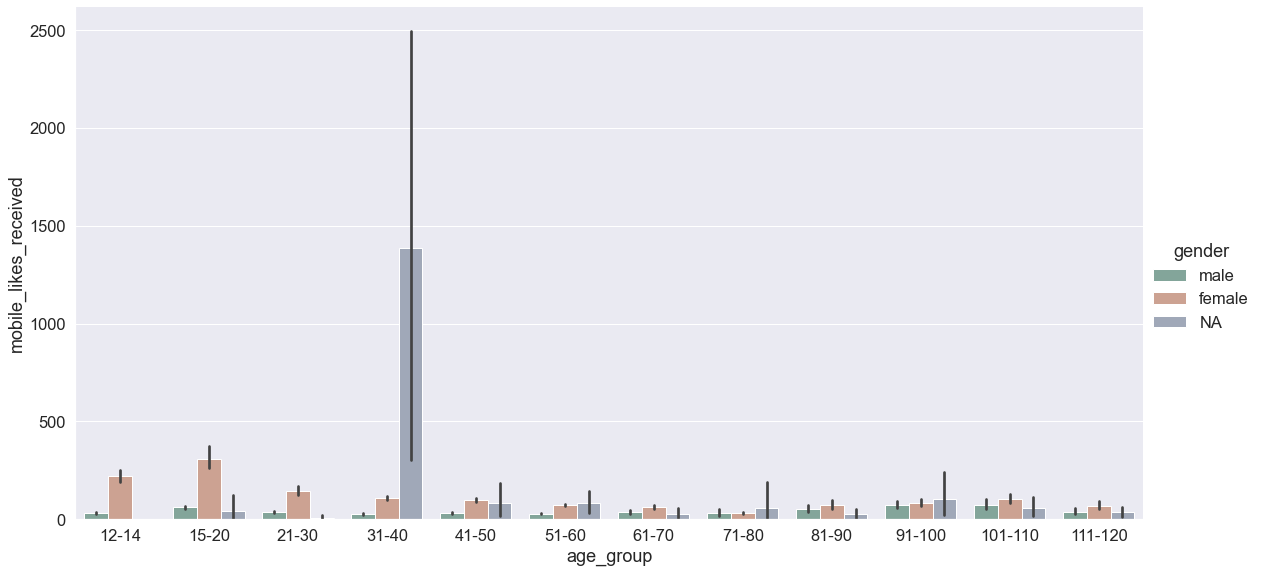

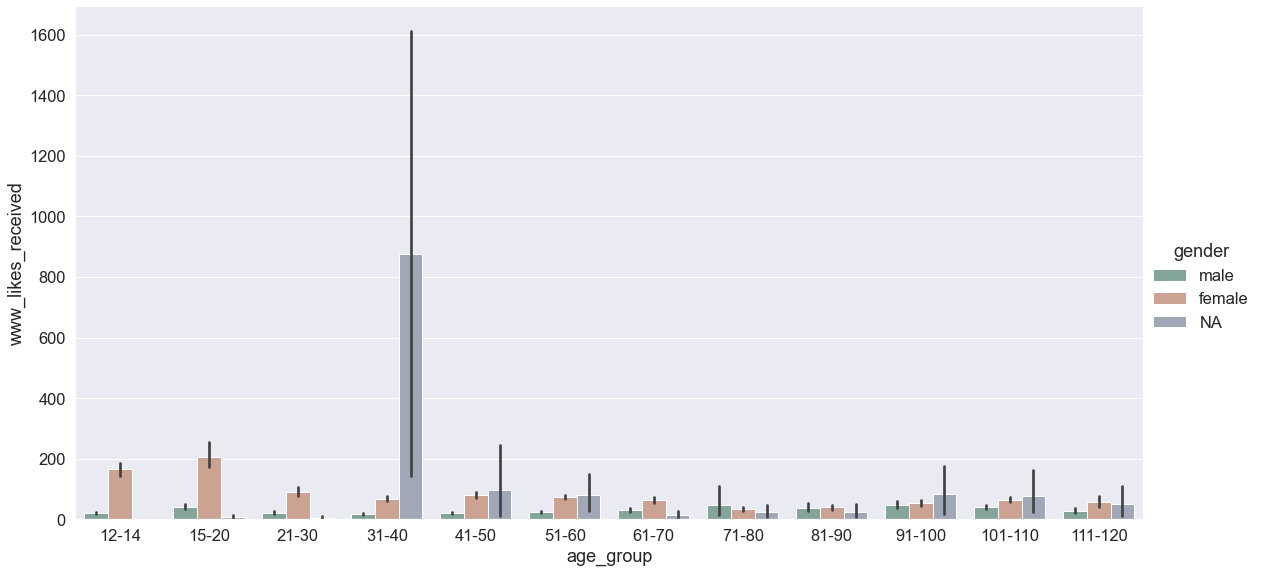

In [35]:
Likes = ['likes', 'mobile_likes', 'www_likes', 'likes_received','mobile_likes_received','www_likes_received']

for value in Likes:
    sns.set(font_scale=1.5)
    sns.set_palette(sns.color_palette("Set2", n_colors=5, desat=.5))
    sns.catplot(x="age_group", y=value,hue ='gender',data=facebook_df, kind="bar",height=8, aspect=2)

* Across the age group more Females are liked the Posts than the Males
* Age group 13 to 20 are more active in liking the Post
* The above pattern is reflecting the same in Likes Received also

In [40]:
Percentage_of_likes = (facebook_df.likes.count() - facebook_df['likes'].value_counts().max()) / (facebook_df.likes.count())*100
Percentage_of_www_likes = (facebook_df.likes.count() - facebook_df['www_likes'].value_counts().max())/(facebook_df.likes.count())*100
Percentage_of_mobile_likes = (facebook_df.likes.count() -  facebook_df['mobile_likes'].value_counts().max())/(facebook_df.likes.count())*100
Percentage_of_likes_received = (facebook_df.likes.count() - facebook_df['likes_received'].value_counts().max())/(facebook_df.likes_received.count())*100
Percentage_of_www_likes_received = (facebook_df.likes.count() - facebook_df['www_likes_received'].value_counts().max())/(facebook_df.likes_received.count())*100
Percentage_of_mobile_likes_received = (facebook_df.likes.count() - facebook_df['mobile_likes_received'].value_counts().max())/(facebook_df.likes_received.count())*100

print('Percentage of Likes = ',Percentage_of_likes)
print('Percentage of Mobile Likes = ',Percentage_of_mobile_likes)
print('Percentage of Website Likes = ',Percentage_of_www_likes)

print('Percentage of Likes Received = ',Percentage_of_likes_received)
print('Percentage of Mobile Likes Received = ',Percentage_of_mobile_likes_received)
print('Percentage of website Likes Received = ',Percentage_of_www_likes_received)

Percentage of Likes =  77.47360977827164
Percentage of Mobile Likes =  64.5961917268549
Percentage of Website Likes =  38.389817667558965
Percentage of Likes Received =  75.33208747916561
Percentage of Mobile Likes Received =  69.70048992373353
Percentage of website Likes Received =  62.76983686044749


In [41]:
Not_mobile_likes = 100- Percentage_of_mobile_likes
Not_www_likes = 100 - Percentage_of_www_likes
Not_mobile_likes_received = 100- Percentage_of_mobile_likes_received
Not_www_likes_received = 100 - Percentage_of_www_likes_received

In [42]:
labels = 'Yes','No'
size1 = [Percentage_of_mobile_likes,Not_mobile_likes]
size2 = [Percentage_of_www_likes,Not_www_likes]
size3 = [Percentage_of_mobile_likes_received,Not_mobile_likes_received]
size4 = [Percentage_of_www_likes_received,Not_www_likes_received]

colors = ['gold', 'lightcoral']
plt.figure(figsize=(18,10), dpi=1600)

ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(size1,labels=labels, colors=colors,autopct='%1.1f%%',startangle=90)
plt.title('Users liked the Posts through Mobile App')

ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(size2,labels=labels, colors=colors,autopct='%1.1f%%',startangle=90)
plt.title('Users liked the Posts through Website')

ax1 = plt.subplot2grid((2,2),(1,0))
plt.pie(size3,labels=labels, colors=colors,autopct='%1.1f%%',startangle=90)
plt.title('Users Received the likes through Mobile App')

ax1 = plt.subplot2grid((2,2),(1,1))
plt.pie(size4,labels=labels, colors=colors,autopct='%1.1f%%',startangle=90)
plt.title('Users Received the likes through Website')

plt.axis('equal')
plt.show()

* 65% Users liked the Posts through Mobile App
* 70% Users liked the Posts through Website
* 38% Users Received the likes through Mobile App
* 63% Users Received the likes through Website

### Correlation of Features

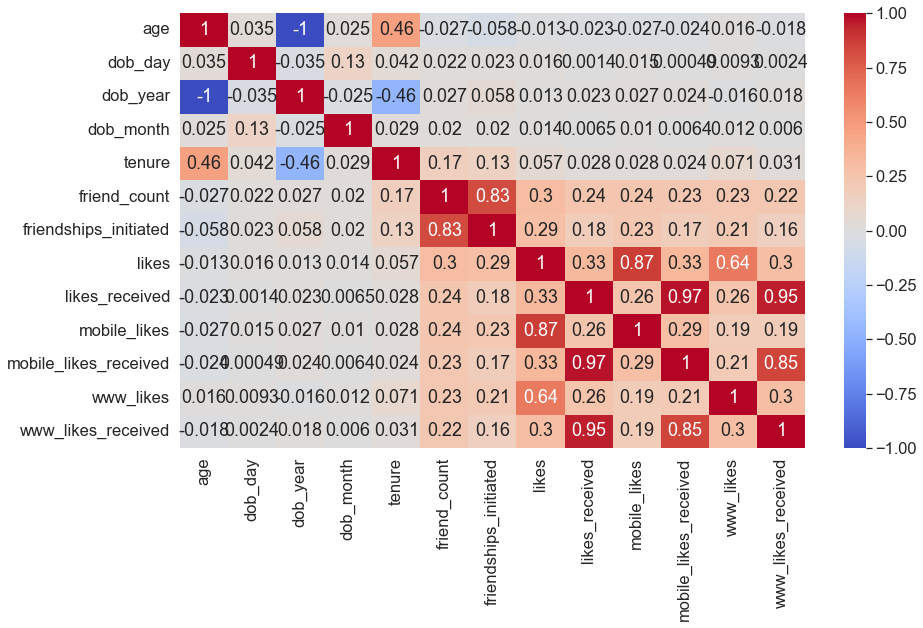

In [43]:
correlations = facebook_df.corr()
f, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(data=correlations, annot = True, cmap='coolwarm')
sns.despine(left=True, bottom=True)

Text(0.5, 1.0, 'Pair Plot')

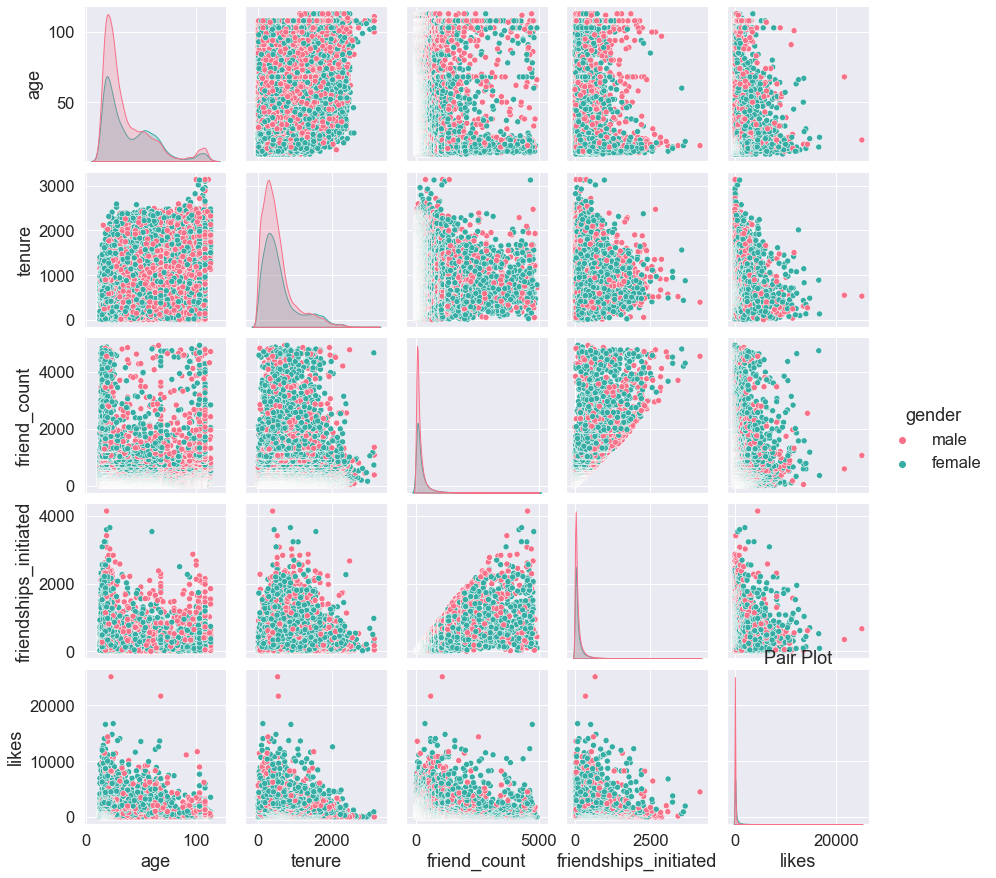

In [44]:
sns.pairplot(facebook_df[['age','gender','tenure','friend_count','friendships_initiated','likes']],
             vars= ['age','tenure','friend_count','friendships_initiated','likes'],hue="gender", palette="husl")
plt.title('Pair Plot')